# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz

In [ ]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [2]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [3]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


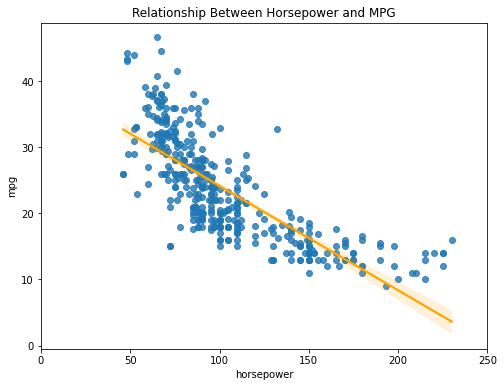

In [4]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [ ]:
# call_on_students(1)

#### Answer: 

- Cost Function (loss function), minimum slope (smallest cost) will be the coefs for our line of best fit


### 2) Imagine that you're starting at a slope towards the top upper left corner. Describe how gradient descent would work.

In [ ]:
# call_on_students(1)

#### Answer: 

- At that particular point we find the gradient (partial derivative). We are then going to take a step down towards our minimum. We repeat this process until we have reached our minimum. Gradient determines step size with a big ***.


### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [ ]:
# call_on_students(1)

#### Answer: 

- Step size as a reflection of how far away you are from minimum. Further away = larger steps, closer = smaller steps. Learning rate is the proportion of the partial derivative that you want to take. 

- Step size captures the amount to change of coefficient each step, as we try to minimize loss.

- Step size incorporates learning rate and gradient.


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [ ]:
# call_on_students(1)

#### Answer: 

- Target: Classification (binary or multiclass), categorical target
- log-odds translated into probabilities, using the logit function
- linear predicts continuous, logistic is bound by 0, 1
- parametric: because the model is calculating optimal coefficients


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [ ]:
# call_on_students(1)

#### Answer: 

- Benefit: simple to interpret (has coefs that can be spoken in manner of y), small fitting times, not super prone to overfitting compared to a decision tree. Can give us probabilities for classes (more fine tuned confidence)

- Still a linear model at the end of the day, doesn't handle multiclass as well as other algorithms. Doesn't handle class imbalance very well by default. (think threshold being 0.5)


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [5]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [6]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [ ]:
# call_on_students(1)

In [7]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop(columns=['target'])
y = mpg_class['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
# Scale the data
ss = StandardScaler()

ss.fit(X_train)

X_train_scld = ss.transform(X_train)
X_test_scld = ss.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [ ]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [13]:
# Code to explore
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- Imbalanced target, we have 74% of data in one class (0)


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- 


#### Part 3: How accurate would that baseline be on test data?


In [12]:
# Code to find the answer
195 / (195 + 67)

0.7442748091603053

#### Answer:

- Accuracy of 0.74 


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [ ]:
# call_on_students(1)

#### Answer:

- Our target is imbalanced, baseline accuracy might be high. Either recall or precision will be high, but the other will be really low, can be misleading. 

- SMOTE: undersampling majority and oversampling minority

- Based on our small sample size we want to avoid undersampling, so we could oversample our 1's


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [36]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)

logreg.fit(X_train_scld, y_train)

print(logreg.score(X_train_scld, y_train), logreg.score(X_test_scld, y_test))

0.950381679389313 0.9230769230769231


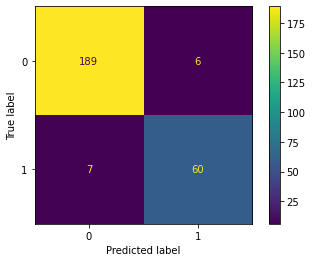

In [35]:
plot_confusion_matrix(logreg, X_train_scld, y_train);

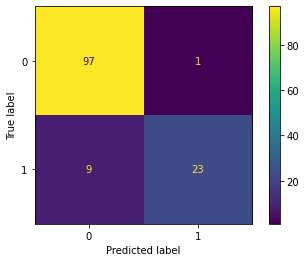

In [16]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scld, y_test);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
# call_on_students(1)

In [17]:
# Accuracy
accuracy_score(y_test, logreg.predict(X_test_scld))

0.9230769230769231

In [18]:
# Precision
precision_score(y_test, logreg.predict(X_test_scld))

0.9583333333333334

In [19]:
# Recall
recall_score(y_test, logreg.predict(X_test_scld))

0.71875

In [20]:
# F1-Score
f1_score(y_test, logreg.predict(X_test_scld))

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [ ]:
# call_on_students(1)

In [39]:
# Calculate roc-auc
roc_auc_score(y_test, logreg.predict_proba(X_test_scld)[:,1])

0.9811862244897959

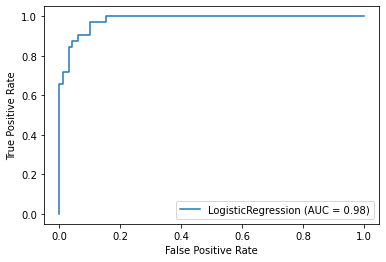

In [40]:
# Plot the ROC curve
plot_roc_curve(estimator=logreg, X=X_test_scld, y=y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

- Acc is 92%, improvement over baseline. Precision higher than recall (Avoiding FP). More FN than FPs. Our model is correctly predicting our true class 92% of the time.


## Part 4: Decision Trees

### Set Up


| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- The split for the weight feature is better split because it minimizes the gini values more. Also, both nodes are closer to pure nodes than the other split.


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [43]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train), dt.score(X_test, y_test))

1.0 0.9153846153846154


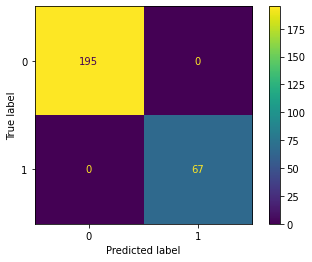

In [44]:
plot_confusion_matrix(dt, X_train, y_train);

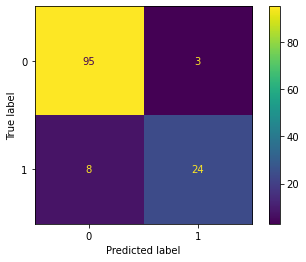

In [45]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test, y_test);

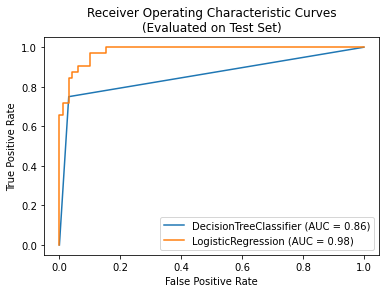

In [47]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scld, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

In [41]:
roc_auc_score(y_test, dt.predict_proba(X_test_scld)[:,1])

0.8596938775510203

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- The logistic regression model performs better. It is better at predicting our true positives. Our AUC score is higher.
